In [2]:
import pandas as pd

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error

def wrangle(df, filepath):
        df = pd.read_csv(filepath)

        na_pct = df.isna().mean() * 100 
        na_pct_col = na_pct[na_pct > 10]
        
        df[ft] = df[ft].fillna(method=met)
        

    def drop_columns(self, df, ft):
        print("Columns before droping: ", self.df.columns)
        self.df = self.df.drop(ft, axis=1)
        print("Columns after droping: ", self.df.columns)
        return self.df.shape
    
    def plotting(self, df):
        fig, axes = plt.subplots(11, 7, figsize=(15, 25))
        axes = axes.ravel()
        for i, col in enumerate(self.df.columns):
            if self.df[col].dtype == "object":
                sns.countplot(x=self.df[col], ax=axes[i])
            else:
                sns.distplot(x=self.df[col], ax=axes[i])
            axes[i].set_title(col)
        plt.tight_layout()
        plt.show()

    def plot_box(self, df):
        fig, ax = plt.subplots(10, 4, figsize=(15, 25))
        ax = ax.ravel()
        for i, col in enumerate(self.df.columns):
           sns.distplot(x=self.df[col], ax=ax[i])
           ax[i].set_title(col)
        plt.tight_layout()
        plt.show()


In [4]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
na_pct = test.isna().mean() * 100 
na_pct_col = na_pct[na_pct > 17]
print(na_pct_col)

Alley          92.666210
FireplaceQu    50.034270
PoolQC         99.794380
Fence          80.123372
MiscFeature    96.504455
dtype: float64


In [6]:
na_pct = test.isna().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64


In [7]:
df.shape

(1460, 81)

In [8]:
na_pct = df.isna().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2).fit_transform(df)
df = pd.DataFrame(imputer, columns=df.columns)
df.head()

df["LotFrontage"] = df["LotFrontage"].fillna(method="ffill")
df["MasVnrType"] = df["MasVnrType"].fillna(method="ffill")
df["MasVnrArea"] = df["MasVnrArea"].fillna(method="ffill")
df["BsmtQual"] = df["BsmtQual"].fillna(method="ffill")
df["BsmtCond"] = df["BsmtCond"].fillna(method="ffill")
df["BsmtExposure"] = df["BsmtExposure"].fillna(method="ffill")
df["BsmtExposure"] = df["BsmtExposure"].fillna(method="ffill")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(method="ffill")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(method="ffill")
df["Electrical"] = df["Electrical"].fillna(method="ffill")
df["GarageType"] = df["GarageType"].fillna(method="ffill")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(method="ffill")
df["GarageFinish"] = df["GarageFinish"].fillna(method="ffill")
df["GarageQual"] = df["GarageQual"].fillna(method="ffill")
df["GarageCond"] = df["GarageCond"].fillna(method="ffill")

In [9]:
na_pct = df.isna().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [10]:
df = df.drop(columns=["Id", "MiscFeature", "Fence", "PoolQC", "FireplaceQu", "Alley"], axis=1)

In [11]:
df.shape

(1460, 75)

In [12]:
na_pct = df.isna().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


df = df.dropna()

In [13]:
df.shape

(1460, 75)

C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\1813676243.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], ax=axes[i])
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\1813676243.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], ax=axes[i])
C:\Users\Babar\AppData\Loc

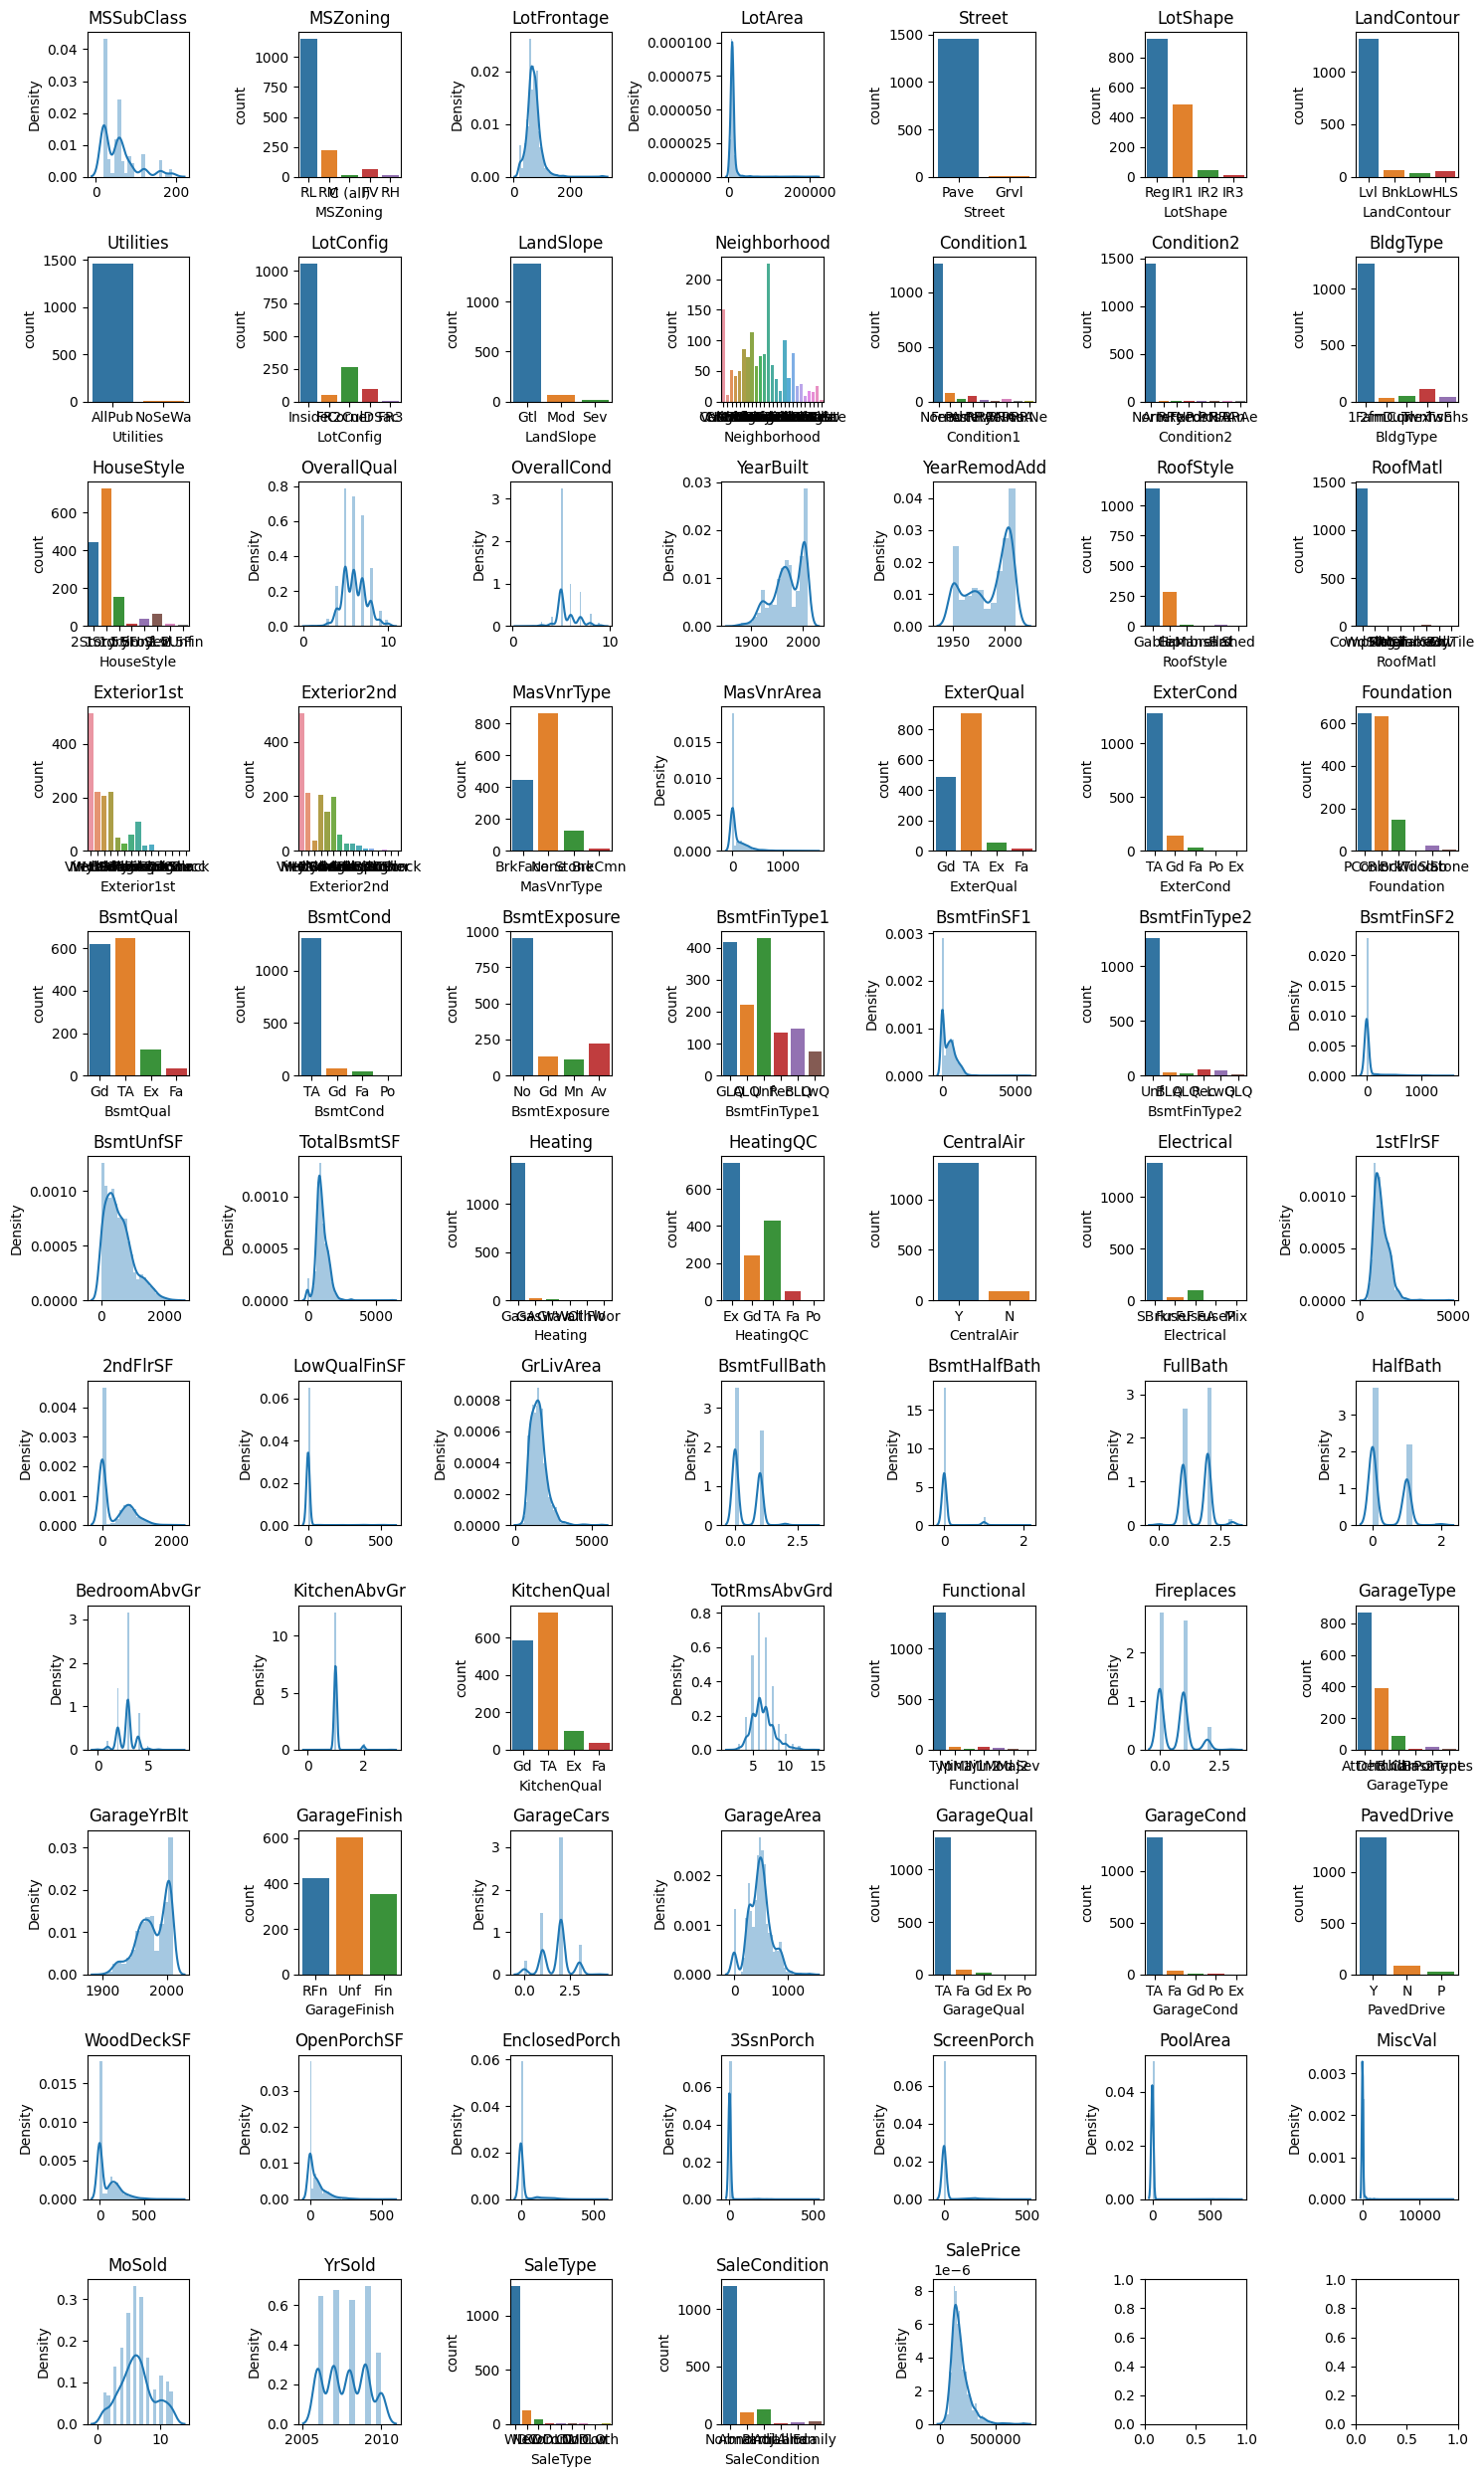

In [14]:
fig, axes = plt.subplots(11, 7, figsize=(15, 25))
axes = axes.ravel()
for i, col in enumerate(df.columns):
    if df[col].dtype == "object":
        sns.countplot(x=df[col], ax=axes[i])
    else:
        sns.distplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [15]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == "object":
        cat.append(col)
    else:
        num.append(col)
print(len(cat))
print(len(num))
cat_df = df[cat]
num_df = df[num]
print(cat_df.shape)
print(num_df.shape)

38
37
(1460, 38)
(1460, 37)


# Categorical Columns

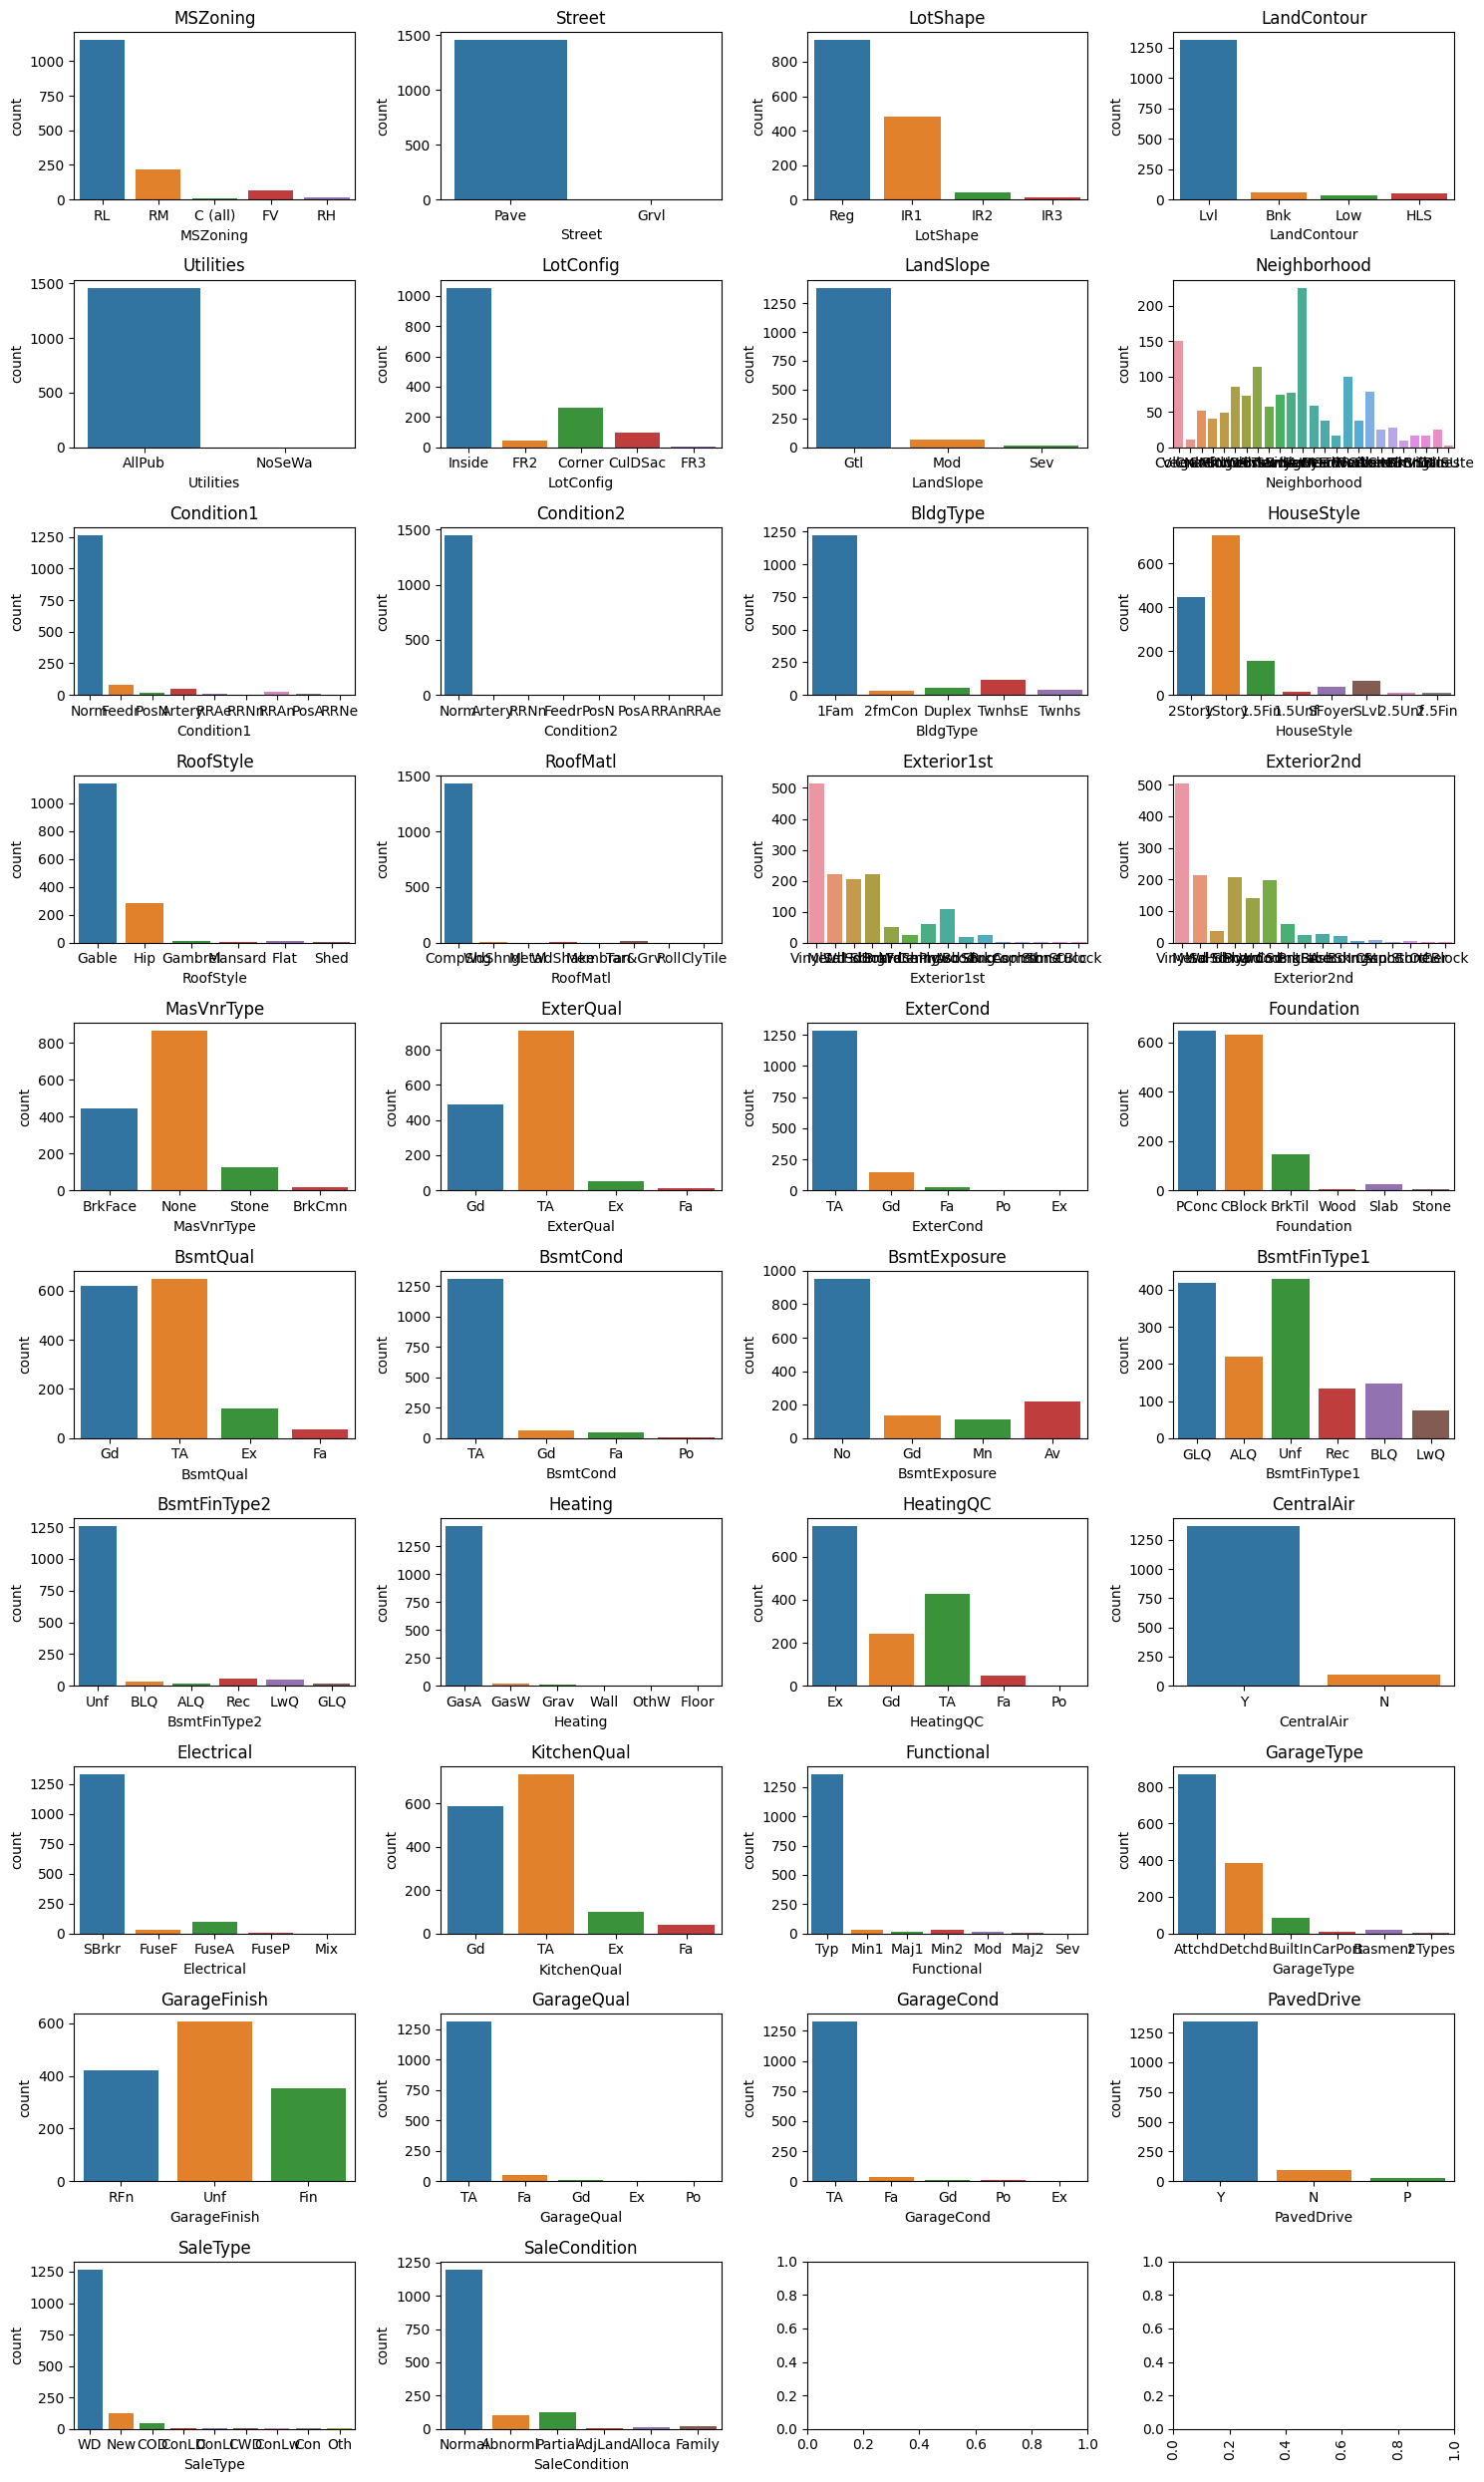

In [16]:
fig, axes = plt.subplots(10, 4, figsize=(15, 25))

axes = axes.ravel()
for i, col in enumerate(cat_df.columns):
    sns.countplot(x=cat_df[col], ax=axes[i])
    if col in ["Neighborhood", "Condition2", "Condition1", "RoofMatl", "Exterior1st", "GarageType", "Exterior2nd", "SaleType"]:
        plt.xticks(rotation=90)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

replace_values = {"Grvl":"Pave", "NoSeWa": "AllPub", "FR3":"FR2", "Sev":"Mod",
"Feedr":"Others", "Artery":"Others","RRAn":"Others","PosN":"Others", 
"RRAe":"Others","PosA":"Others", "RRNn": "Others", "RRNe":"Others", 
"TwnhsE":"Others","Twnhs":"Others", "Duplex": "Others", "2fmCon":"Others", 
"SLvl":"Others","SFoyer":"Others", "1.5Unf": "Others", "2.5Unf":"Others", 
"2.5Fin":"Others","1.5Fin":"Others", "Hip":"Others","Flat":"Others", 
"Gambrel": "Others", "Mansard":"Others", "Shed":"Others","Tar&Grv":"Others",
"WdShngl":"Others", "WdShake": "Others", "Metal":"Others", "Membran":"Others", 
"Roll":"Others", "ClyTile":"Others","Plywood":"Others","CemntBd":"Others", 
"BrkFace": "Others", "Stucco":"Others", "WdShing":"Others", "AsbShng":"Others", 
"Stone":"Others", "BrkComm":"Others", "ImStucc":"Others", "CBlock":"Others",
"None":"Others","BrkCmn":"Others", "Ex":"Others","Fa":"Others", "Gd":"Others", 
"Stone":"Others","BrkTil":"Others", "Wood":"Others","Fa":"Others","Ex":"Others",
"Fa":"Others","Po":"Others", "Gd":"Others","Rec":"Others","LwQ":"Others", 
"BLQ":"Others", "ALQ":"Others", "GLQ":"Others","GasW":"Others","Grav":"Others", 
"OthW":"Others","Fa":"Others","Po":"Others","FuseA":"Others","FuseF":"Others",
"FuseP":"Others", "Mix":"Others","Ex":"Others","Fa":"Others","BuiltIn":"Others",
"Basment":"Others", "CarPort":"Others", "2Types":"Others","Fa":"Others","Gd":"Others",
"Ex":"Others", "Po":"Others","New":"Others", "COD":"Others", "ConLD":"Others",
"ConLI":"Others", "CWD":"Others", "ConLw":"Others", "Con":"Others", "Oth":"Others",
"Family":"Others", "Abnorml":"Others", "Alloca":"Others", "AdjLand":"Others"}

col_repl = ["Street","Utilities","LotConfig","LandSlope","Condition1","BldgType","HouseStyle",
"RoofStyle", "RoofMatl", "Exterior1st", "MasVnrType", "ExterCond", "Foundation", "BsmtQual",
"BsmtCond", "BsmtFinType2", "Heating", "HeatingQC", "Electrical", "KitchenQual", "Functional",
"GarageType", "GarageQual", "SaleType", "SaleCondition"]

for col in col_repl:
    cat_df[col] = cat_df[col].replace(replace_values, inplace=True)

cat_df = cat_df.drop(columns=["Condition2","Exterior2nd","ExterQual","GarageCond"], axis=1)

In [17]:
cat_df["Street"] = cat_df["Street"].replace("Grvl", "Pave")
cat_df["Utilities"] = cat_df["Utilities"].replace("NoSeWa", "AllPub")
cat_df["LotConfig"] = cat_df["LotConfig"].replace("FR3", "FR2")
cat_df["LandSlope"] = cat_df["LandSlope"].replace("Sev", "Mod")
replace_values = {"Feedr":"Others", "Artery":"Others","RRAn":"Others","PosN":"Others", "RRAe":"Others","PosA":"Others", "RRNn": "Others", "RRNe":"Others"}
cat_df["Condition1"] = cat_df["Condition1"].replace(replace_values)
cat_df = cat_df.drop(columns=["Condition2"], axis=1)
replace_values = {"TwnhsE":"Others","Twnhs":"Others", "Duplex": "Others", "2fmCon":"Others"}
cat_df["BldgType"] = cat_df["BldgType"].replace(replace_values)
replace_values = {"SLvl":"Others","SFoyer":"Others", "1.5Unf": "Others", "2.5Unf":"Others", "2.5Fin":"Others","1.5Fin":"Others" }
cat_df["HouseStyle"] = cat_df["HouseStyle"].replace(replace_values)
replace_values = {"Hip":"Others","Flat":"Others", "Gambrel": "Others", "Mansard":"Others", "Shed":"Others"}
cat_df["RoofStyle"] = cat_df["RoofStyle"].replace(replace_values)
replace_values = {"Tar&Grv":"Others","WdShngl":"Others", "WdShake": "Others", "Metal":"Others", "Membran":"Others", "Roll":"Others", "ClyTile":"Others"}
cat_df["RoofMatl"] = cat_df["RoofMatl"].replace(replace_values)
replace_values = {"Plywood":"Others","CemntBd":"Others", "BrkFace": "Others", "Stucco":"Others", "WdShing":"Others", "AsbShng":"Others", "Stone":"Others", "BrkComm":"Others", "ImStucc":"Others", "CBlock":"Others"}
cat_df["Exterior1st"] = cat_df["Exterior1st"].replace(replace_values)
cat_df = cat_df.drop(columns=["Exterior2nd"], axis=1)
replace_values = {"None":"Others","BrkCmn":"Others"}
cat_df["MasVnrType"] = cat_df["MasVnrType"].replace(replace_values)
cat_df = cat_df.drop(columns=["ExterQual"], axis=1)
replace_values = {"Ex":"Others","Fa":"Others", "Gd":"Others"}
cat_df["ExterCond"] = cat_df["ExterCond"].replace(replace_values)
replace_values = {"Stone":"Others","BrkTil":"Others", "Wood":"Others"}
cat_df["Foundation"] = cat_df["Foundation"].replace(replace_values)
replace_values = {"Fa":"Others","Ex":"Others"}
cat_df["BsmtQual"] = cat_df["BsmtQual"].replace(replace_values)
replace_values = {"Fa":"Others","Po":"Others", "Gd":"Others"}
cat_df["BsmtCond"] = cat_df["BsmtCond"].replace(replace_values)
replace_values = {"Rec":"Others","LwQ":"Others", "BLQ":"Others", "ALQ":"Others", "GLQ":"Others"}
cat_df["BsmtFinType2"] = cat_df["BsmtFinType2"].replace(replace_values)
replace_values = {"GasW":"Others","Grav":"Others", "OthW":"Others"}
cat_df["Heating"] = cat_df["Heating"].replace(replace_values)
replace_values = {"Fa":"Others","Po":"Others"}
cat_df["HeatingQC"] = cat_df["HeatingQC"].replace(replace_values)
replace_values = {"FuseA":"Others","FuseF":"Others", "FuseP":"Others", "Mix":"Others"}
cat_df["Electrical"] = cat_df["Electrical"].replace(replace_values)
replace_values = {"Ex":"Others","Fa":"Others"}
cat_df["KitchenQual"] = cat_df["KitchenQual"].replace(replace_values)
replace_values = {"Min2":"Others","Min1":"Others", "Mod":"Others", "Maj1":"Others", "Maj2":"Others", "Sev":"Others"}
cat_df["Functional"] = cat_df["Functional"].replace(replace_values)
replace_values = {"BuiltIn":"Others","Basment":"Others", "CarPort":"Others", "2Types":"Others"}
cat_df["GarageType"] = cat_df["GarageType"].replace(replace_values)
replace_values = {"Fa":"Others","Gd":"Others", "Ex":"Others", "Po":"Others"}
cat_df["GarageQual"] = cat_df["GarageQual"].replace(replace_values)
cat_df = cat_df.drop(columns=["GarageCond"], axis=1)
replace_values = {"New":"Others", "COD":"Others", "ConLD":"Others","ConLI":"Others", "CWD":"Others", "ConLw":"Others", "Con":"Others", "Oth":"Others"}
cat_df["SaleType"] = cat_df["SaleType"].replace(replace_values)
replace_values = {"Family":"Others", "Abnorml":"Others", "Alloca":"Others", "AdjLand":"Others"}
cat_df["SaleCondition"] = cat_df["SaleCondition"].replace(replace_values)

C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\237473201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["Street"] = cat_df["Street"].replace("Grvl", "Pave")
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\237473201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["Utilities"] = cat_df["Utilities"].replace("NoSeWa", "AllPub")
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\237473201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

cat_df["Street"] = cat_df["Street"].replace("Grvl", "Pave")
cat_df["Utilities"] = cat_df["Utilities"].replace("NoSeWa", "AllPub")
cat_df["LotConfig"] = cat_df["LotConfig"].replace("FR3", "FR2")
cat_df["LandSlope"] = cat_df["LandSlope"].replace("Sev", "Mod")
replace_values = {"Feedr":"Others", "Artery":"Others","RRAn":"Others","PosN":"Others", "RRAe":"Others","PosA":"Others", "RRNn": "Others", "RRNe":"Others"}
cat_df["Condition1"] = cat_df["Condition1"].replace(replace_values)
cat_df = cat_df.drop(columns=["Condition2"], axis=1)
replace_values = {"TwnhsE":"Others","Twnhs":"Others", "Duplex": "Others", "2fmCon":"Others"}
cat_df["BldgType"] = cat_df["BldgType"].replace(replace_values)
replace_values = {"SLvl":"Others","SFoyer":"Others", "1.5Unf": "Others", "2.5Unf":"Others", "2.5Fin":"Others","1.5Fin":"Others" }
cat_df["HouseStyle"] = cat_df["HouseStyle"].replace(replace_values)
replace_values = {"Hip":"Others","Flat":"Others", "Gambrel": "Others", "Mansard":"Others", "Shed":"Others"}
cat_df["RoofStyle"] = cat_df["RoofStyle"].replace(replace_values)
replace_values = {"Tar&Grv":"Others","WdShngl":"Others", "WdShake": "Others", "Metal":"Others", "Membran":"Others", "Roll":"Others", "ClyTile":"Others"}
cat_df["RoofMatl"] = cat_df["RoofMatl"].replace(replace_values)
replace_values = {"Plywood":"Others","CemntBd":"Others", "BrkFace": "Others", "Stucco":"Others", "WdShing":"Others", "AsbShng":"Others", "Stone":"Others", "BrkComm":"Others", "ImStucc":"Others", "CBlock":"Others"}
cat_df["Exterior1st"] = cat_df["Exterior1st"].replace(replace_values)
cat_df = cat_df.drop(columns=["Exterior2nd"], axis=1)
replace_values = {"None":"Others","BrkCmn":"Others"}
cat_df["MasVnrType"] = cat_df["MasVnrType"].replace(replace_values)
cat_df = cat_df.drop(columns=["ExterQual"], axis=1)
replace_values = {"Ex":"Others","Fa":"Others", "Gd":"Others"}
cat_df["ExterCond"] = cat_df["ExterCond"].replace(replace_values)
replace_values = {"Stone":"Others","BrkTil":"Others", "Wood":"Others"}
cat_df["Foundation"] = cat_df["Foundation"].replace(replace_values)
replace_values = {"Fa":"Others","Ex":"Others"}
cat_df["BsmtQual"] = cat_df["BsmtQual"].replace(replace_values)
replace_values = {"Fa":"Others","Po":"Others", "Gd":"Others"}
cat_df["BsmtCond"] = cat_df["BsmtCond"].replace(replace_values)
replace_values = {"Rec":"Others","LwQ":"Others", "BLQ":"Others", "ALQ":"Others", "GLQ":"Others"}
cat_df["BsmtFinType2"] = cat_df["BsmtFinType2"].replace(replace_values)
replace_values = {"GasW":"Others","Grav":"Others", "OthW":"Others"}
cat_df["Heating"] = cat_df["Heating"].replace(replace_values)
replace_values = {"Fa":"Others","Po":"Others"}
cat_df["HeatingQC"] = cat_df["HeatingQC"].replace(replace_values)
replace_values = {"FuseA":"Others","FuseF":"Others", "FuseP":"Others", "Mix":"Others"}
cat_df["Electrical"] = cat_df["Electrical"].replace(replace_values)
replace_values = {"Ex":"Others","Fa":"Others"}
cat_df["KitchenQual"] = cat_df["KitchenQual"].replace(replace_values)
replace_values = {"Min2":"Others","Min1":"Others", "Mod":"Others", "Maj1":"Others", "Maj2":"Others", "Sev":"Others"}
cat_df["Functional"] = cat_df["Functional"].replace(replace_values)
replace_values = {"BuiltIn":"Others","Basment":"Others", "CarPort":"Others", "2Types":"Others"}
cat_df["GarageType"] = cat_df["GarageType"].replace(replace_values)
replace_values = {"Fa":"Others","Gd":"Others", "Ex":"Others", "Po":"Others"}
cat_df["GarageQual"] = cat_df["GarageQual"].replace(replace_values)
cat_df = cat_df.drop(columns=["GarageCond"], axis=1)
replace_values = {"New":"Others", "COD":"Others", "ConLD":"Others","ConLI":"Others", "CWD":"Others", "ConLw":"Others", "Con":"Others", "Oth":"Others"}
cat_df["SaleType"] = cat_df["SaleType"].replace(replace_values)
replace_values = {"Family":"Others", "Abnorml":"Others", "Alloca":"Others", "AdjLand":"Others"}
cat_df["SaleCondition"] = cat_df["SaleCondition"].replace(replace_values)

In [18]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())
    

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1460
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1460
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          51
Name: LotConfig, dtype: int64
Gtl    1382
Mod      78
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Others     200
Name: Condition1, dtype: int64
1Fam      1220
Others     240
Name: 

In [19]:
cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
cat_df["SaleType"].unique()

array(['WD', 'Others'], dtype=object)

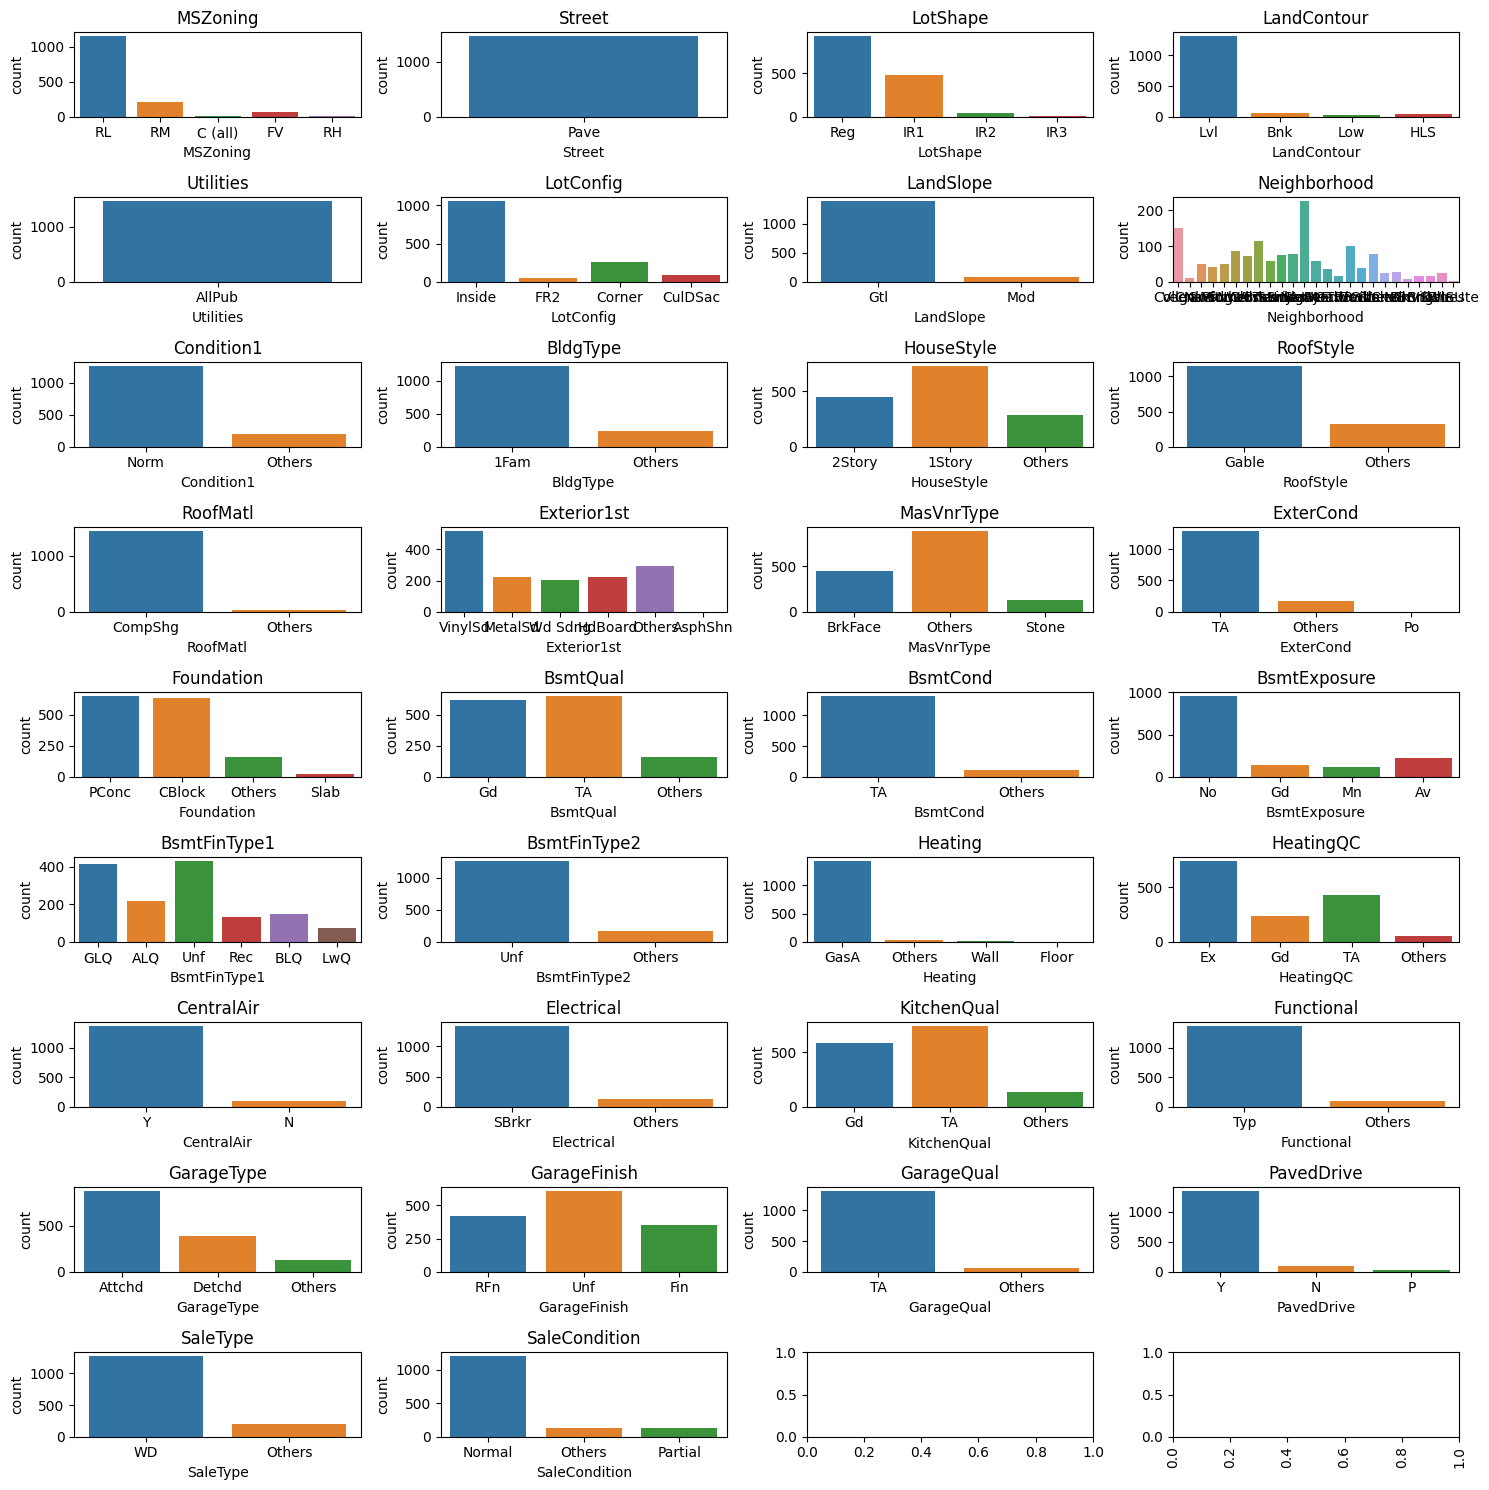

In [21]:
fig, axes = plt.subplots(9, 4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(cat_df.columns):
    sns.countplot(x=cat_df[col], ax=axes[i])
    if col in ["Neighborhood", "Condition2", "Condition1", "RoofMatl", "Exterior1st", "GarageType", "Exterior2nd", "SaleType"]:
        plt.xticks(rotation=90)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [22]:
na_pct = cat_df.isna().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

MasVnrType      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
dtype: float64


In [23]:
cat_df = pd.get_dummies(data=cat_df, drop_first=True)

In [24]:
cat_df.tail()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_WD,SaleCondition_Others,SaleCondition_Partial
1455,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,1,0,0
1456,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,1,0,1,1,0,0
1457,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,1,0,0
1458,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,1,0,1,1,0,0
1459,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0


In [25]:
cat_df.shape

(1460, 89)

In [26]:
na_pct = cat_df.isnull().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

Series([], dtype: float64)


# Numerical 

In [27]:
num_df.shape

(1460, 37)

In [28]:
na_pct = num_df.isnull().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64


In [29]:
from sklearn.impute import KNNImputer

In [30]:
imp = KNNImputer().fit_transform(num_df)
num_df = pd.DataFrame(imp, columns=num_df.columns)

In [31]:
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [32]:
na_pct = num_df.isnull().mean() * 100 
na_pct_col = na_pct[na_pct > 0]
print(na_pct_col)

Series([], dtype: float64)


# Categorical with numerical formats

In [33]:
num_cat_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                'YearBuilt', 'YearRemodAdd']
num_cat_cols = num_df[num_cat_col]

num_cat_pct = num_cat_cols.isnull().mean() * 100 
na_pct_col = num_cat_pct[na_pct > 0]
print(na_pct_col)

In [34]:
num_cat_cols.shape

(1460, 14)

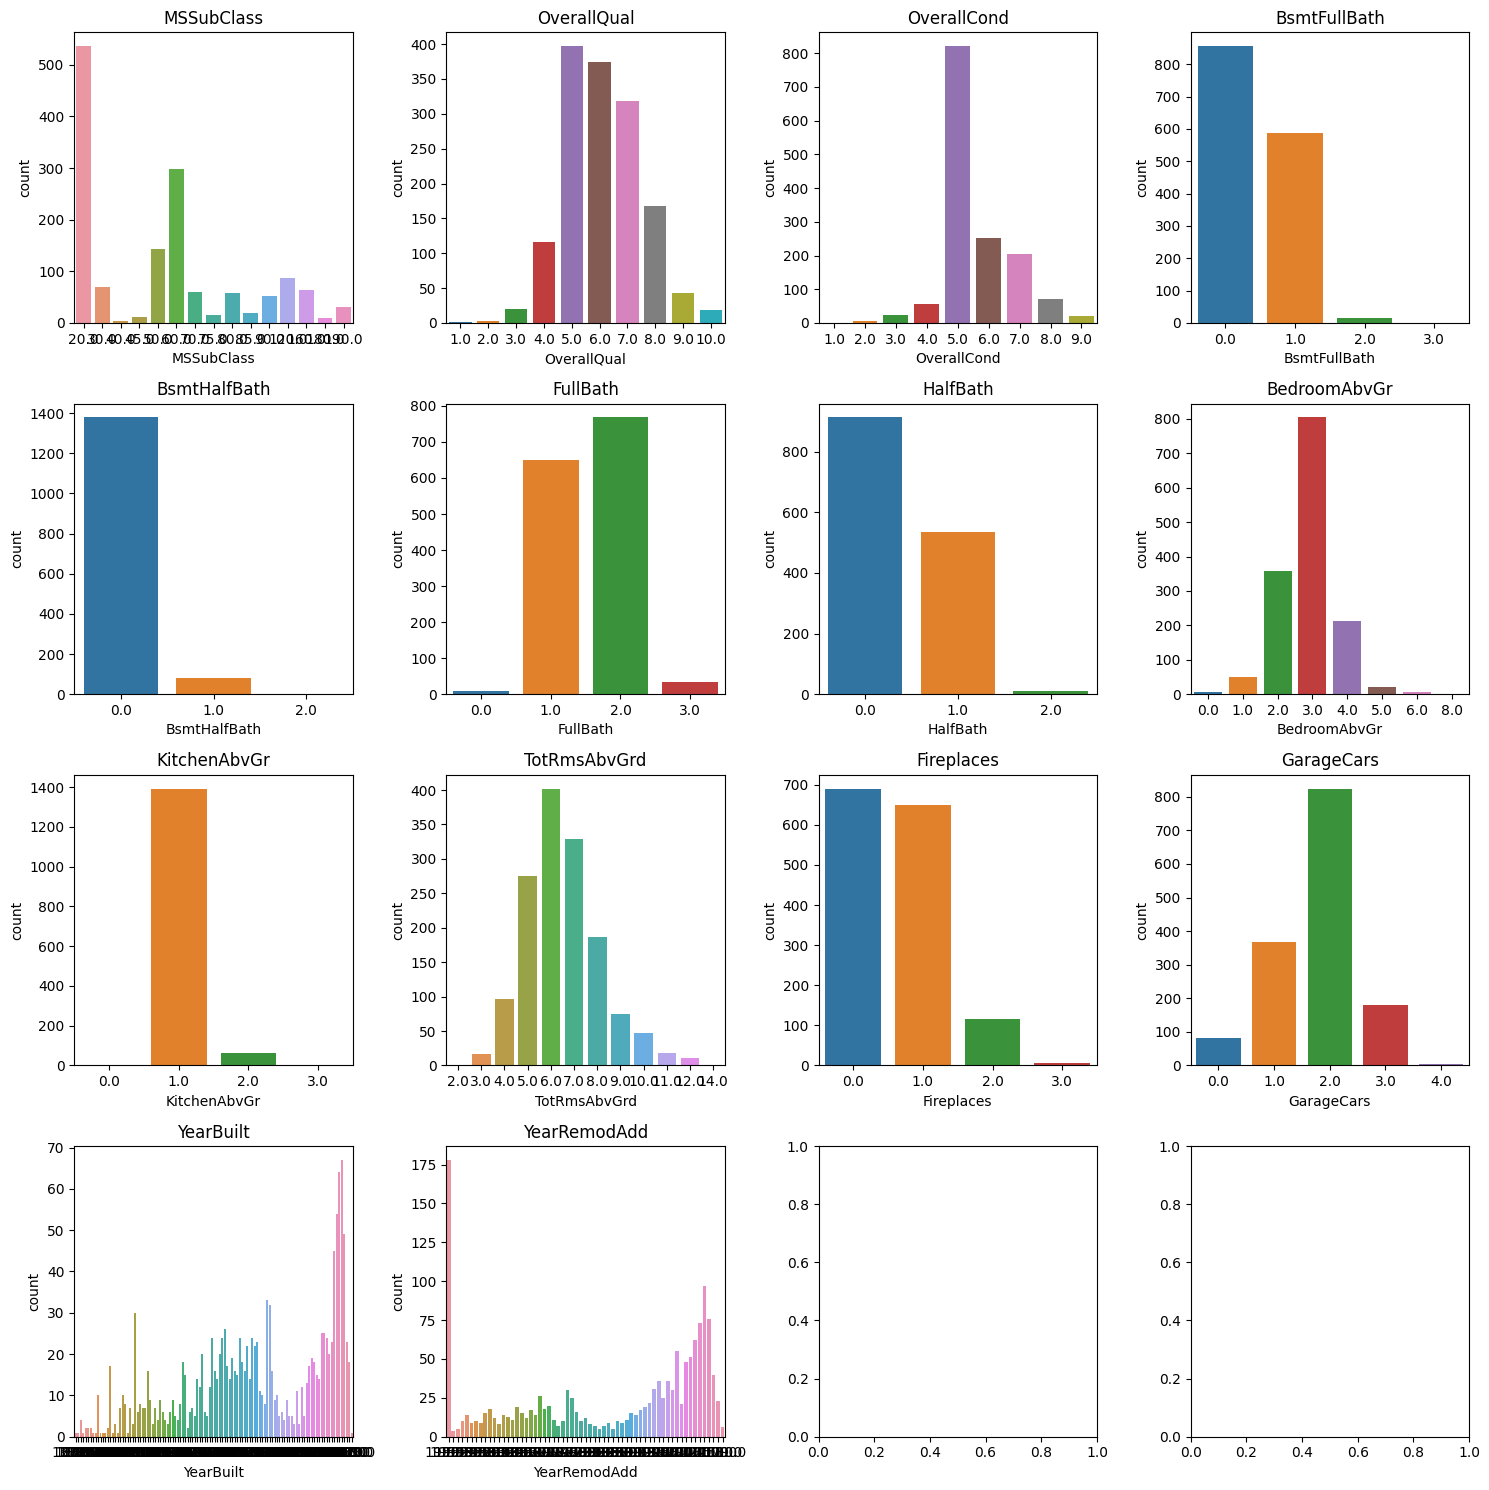

In [35]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(num_cat_cols.columns):
    sns.countplot(x=num_cat_cols[col], ax=axes[i])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [36]:
num_cat_cols["YearBuilt_bins"] = pd.cut(num_cat_cols["YearBuilt"], bins=3, labels=("Best", "Better", "Good"))
num_cat_cols["YearRemodAdd_bins"] = pd.cut(num_cat_cols["YearRemodAdd"], bins=3, labels=("Okay", "Worse", "Worst"))

C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2869413301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cat_cols["YearBuilt_bins"] = pd.cut(num_cat_cols["YearBuilt"], bins=3, labels=("Best", "Better", "Good"))
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2869413301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cat_cols["YearRemodAdd_bins"] = pd.cut(num_cat_cols["YearRemodAdd"], bins=3, labels=("Okay", "Worse", "Worst"))


In [37]:
num_cat_cols = num_cat_cols.drop(columns=["YearRemodAdd", "YearBuilt"], axis=1)

In [38]:
num_cat_cols.head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,YearBuilt_bins,YearRemodAdd_bins
0,60.0,7.0,5.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,Good,Worst
1,20.0,6.0,8.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,Good,Worse
2,60.0,7.0,5.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,Good,Worst
3,70.0,7.0,5.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,Best,Okay
4,60.0,8.0,5.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,Good,Worst


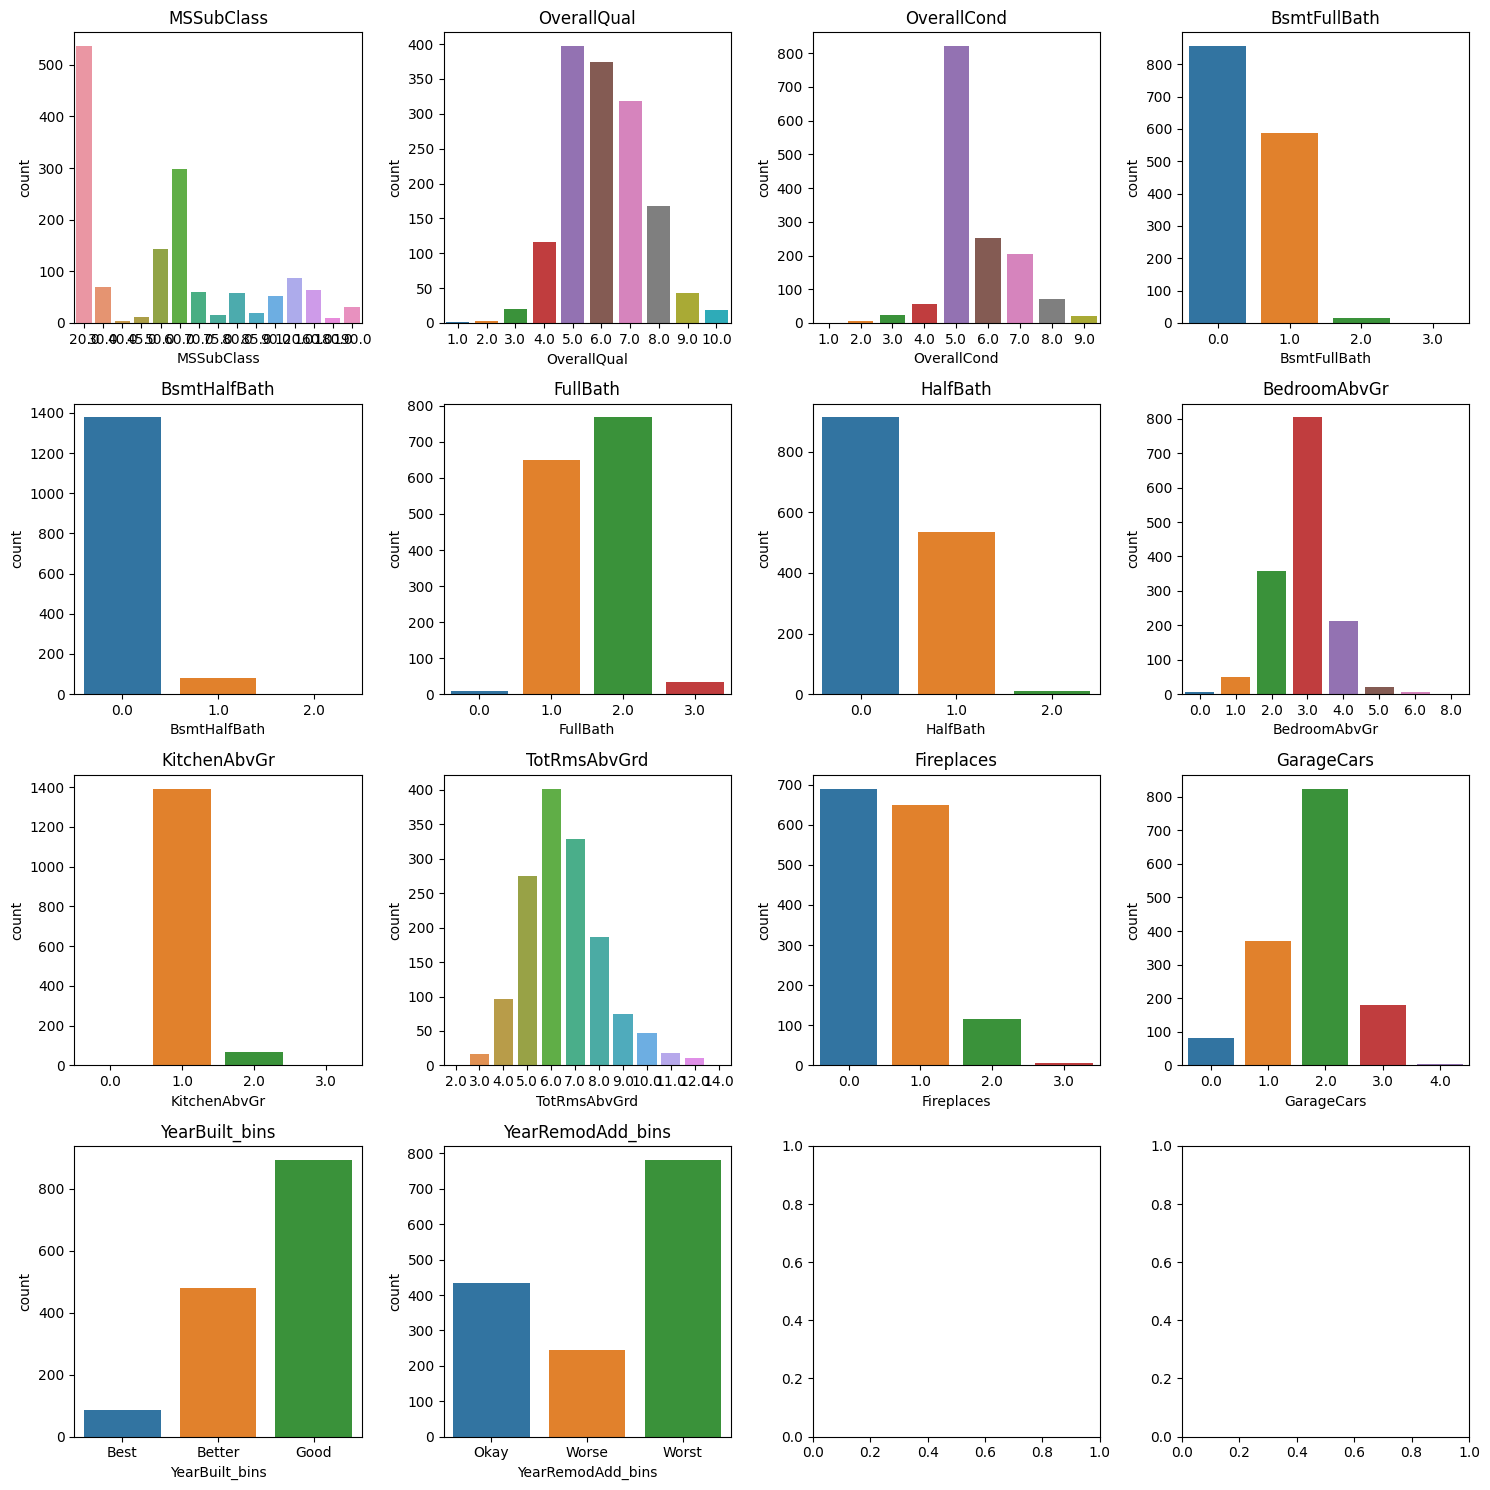

In [39]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(num_cat_cols.columns):
    sns.countplot(x=num_cat_cols[col], ax=axes[i])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [40]:
# num_cat_cols = pd.Categorical(num_cat_cols, categories=[0, 1], ordered=True)

In [41]:
num_cat_cols = num_cat_cols.astype("object")

In [42]:
num_cat_cols.dtypes

MSSubClass           object
OverallQual          object
OverallCond          object
BsmtFullBath         object
BsmtHalfBath         object
FullBath             object
HalfBath             object
BedroomAbvGr         object
KitchenAbvGr         object
TotRmsAbvGrd         object
Fireplaces           object
GarageCars           object
YearBuilt_bins       object
YearRemodAdd_bins    object
dtype: object

In [43]:
num_cat_cols = pd.get_dummies(data=num_cat_cols, drop_first=True)

C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2373890255.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  num_cat_cols = pd.get_dummies(data=num_cat_cols, drop_first=True)
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2373890255.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  num_cat_cols = pd.get_dummies(data=num_cat_cols, drop_first=True)
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2373890255.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  num_cat_cols = pd.get_dummies(data=num_cat_cols, drop_first=True)
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2373890255.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric d

In [44]:
num_cat_cols.head()

,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,...,Fireplaces_2.0,Fireplaces_3.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,YearBuilt_bins_Better,YearBuilt_bins_Good,YearRemodAdd_bins_Worse,YearRemodAdd_bins_Worst
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [45]:
num_cat_cols.columns

Index(['MSSubClass_30.0', 'MSSubClass_40.0', 'MSSubClass_45.0',
       'MSSubClass_50.0', 'MSSubClass_60.0', 'MSSubClass_70.0',
       'MSSubClass_75.0', 'MSSubClass_80.0', 'MSSubClass_85.0',
       'MSSubClass_90.0', 'MSSubClass_120.0', 'MSSubClass_160.0',
       'MSSubClass_180.0', 'MSSubClass_190.0', 'OverallQual_2.0',
       'OverallQual_3.0', 'OverallQual_4.0', 'OverallQual_5.0',
       'OverallQual_6.0', 'OverallQual_7.0', 'OverallQual_8.0',
       'OverallQual_9.0', 'OverallQual_10.0', 'OverallCond_2.0',
       'OverallCond_3.0', 'OverallCond_4.0', 'OverallCond_5.0',
       'OverallCond_6.0', 'OverallCond_7.0', 'OverallCond_8.0',
       'OverallCond_9.0', 'BsmtFullBath_1.0', 'BsmtFullBath_2.0',
       'BsmtFullBath_3.0', 'BsmtHalfBath_1.0', 'BsmtHalfBath_2.0',
       'FullBath_1.0', 'FullBath_2.0', 'FullBath_3.0', 'HalfBath_1.0',
       'HalfBath_2.0', 'BedroomAbvGr_1.0', 'BedroomAbvGr_2.0',
       'BedroomAbvGr_3.0', 'BedroomAbvGr_4.0', 'BedroomAbvGr_5.0',
       'BedroomAbvGr_

In [46]:
num_cat_cols.shape

(1460, 73)

In [47]:
cat_mrg = pd.concat([cat_df, num_cat_cols], axis=1)

In [48]:
cat_mrg.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,Fireplaces_2.0,Fireplaces_3.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,YearBuilt_bins_Better,YearBuilt_bins_Good,YearRemodAdd_bins_Worse,YearRemodAdd_bins_Worst
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [49]:
cat_mrg.shape

(1460, 162)

## Numerical Columns

In [50]:
num_col = ['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 
           'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 
           'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
num_cols = num_df[num_col]

In [51]:
num_cols.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,2003.0,548.0,0.0,61.0,208500.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,1976.0,460.0,298.0,0.0,181500.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,2001.0,608.0,0.0,42.0,223500.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1998.0,642.0,0.0,35.0,140000.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,2000.0,836.0,192.0,84.0,250000.0


In [52]:
num_cols.shape

(1460, 16)

C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\528441086.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_cols[col], ax=axes[i])
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\528441086.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_cols[col], ax=axes[i])
C:\Users\Babar\A

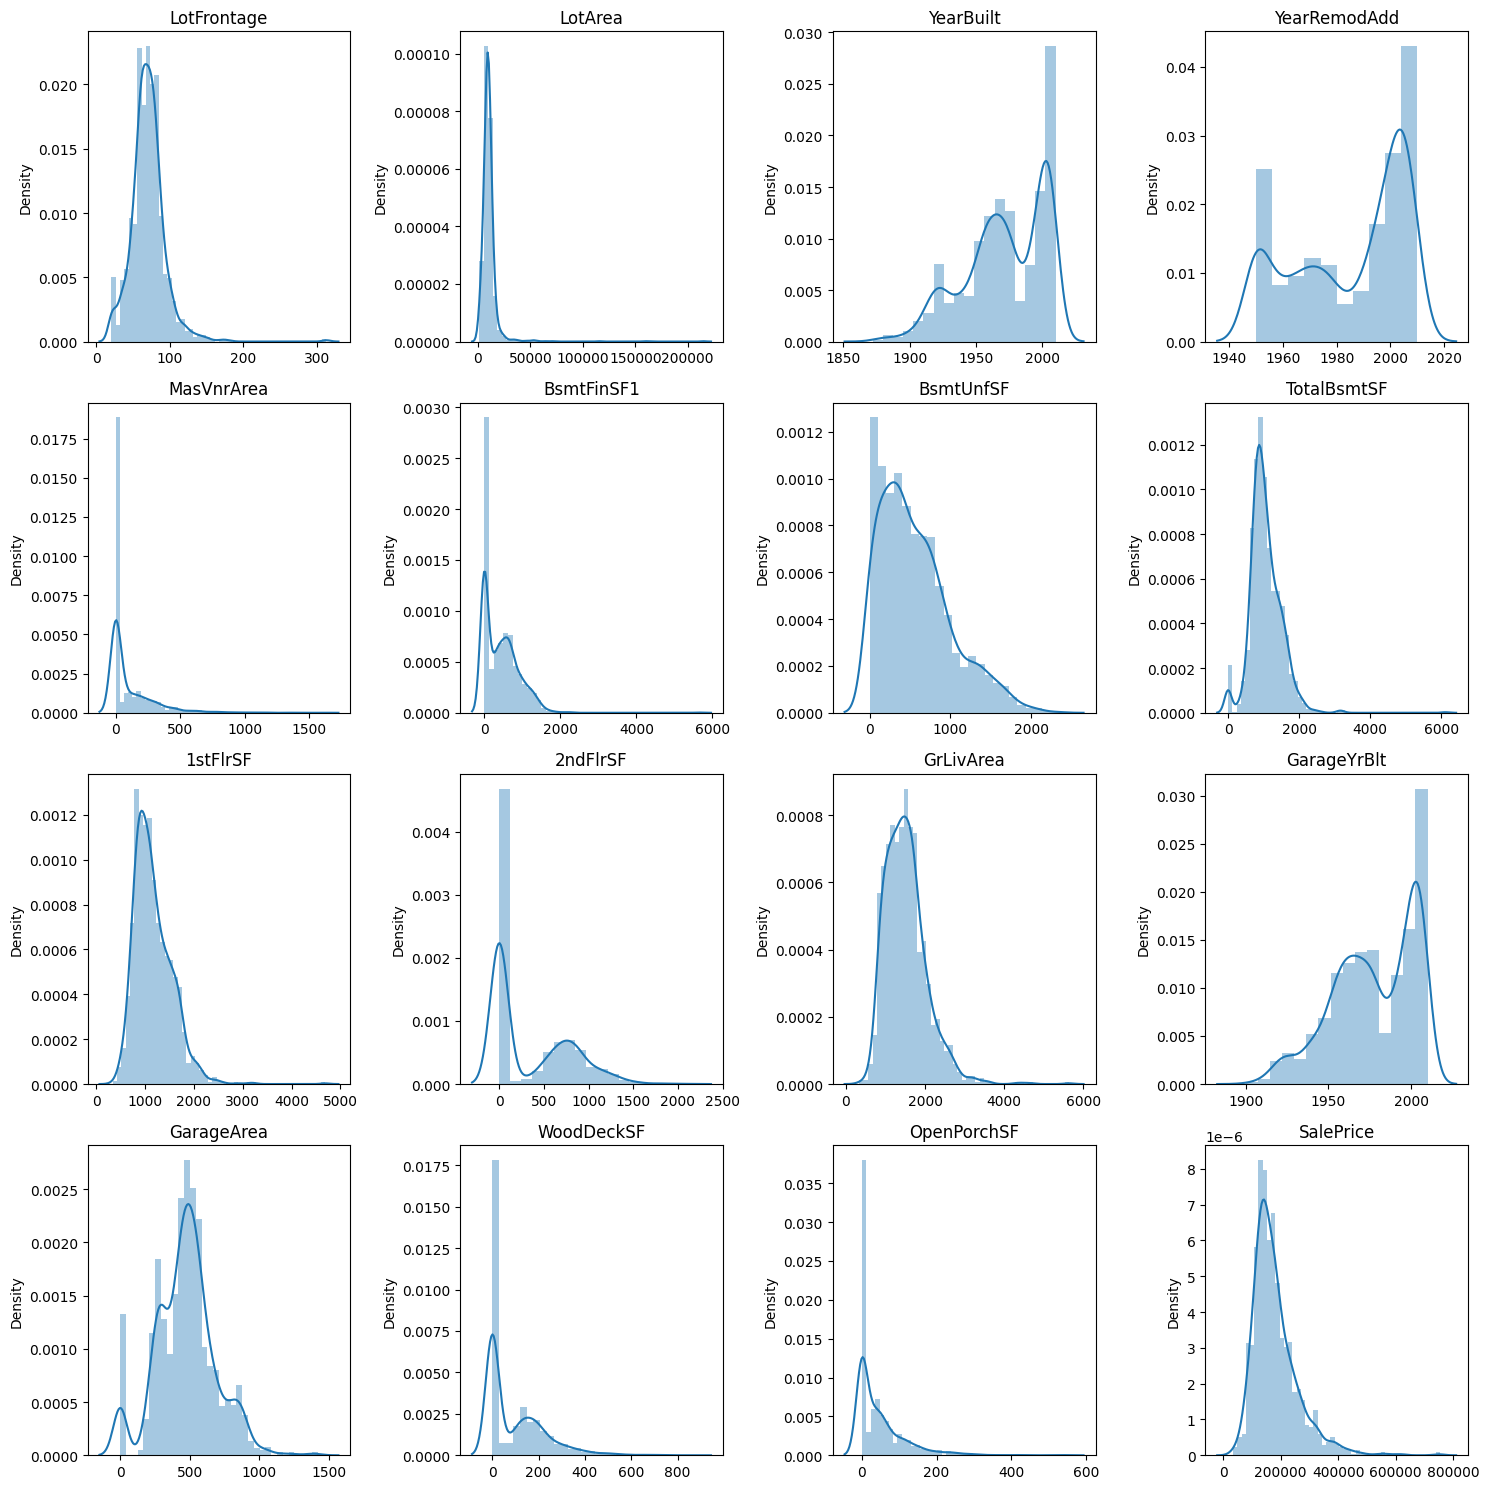

In [53]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(num_cols.columns):
    sns.distplot(x=num_cols[col], ax=axes[i])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [54]:
sk = num_cols.skew()
abs_sk = abs(sk)
high_sk = abs_sk[abs_sk > 0.5]
from scipy.stats import skew
from scipy.special import boxcox1p
for feature in high_sk.index:
    num_cols[feature] = boxcox1p(num_cols[feature], 0.15)

C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\2228990777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cols[feature] = boxcox1p(num_cols[feature], 0.15)


C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\528441086.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_cols[col], ax=axes[i])
C:\Users\Babar\AppData\Local\Temp\ipykernel_6004\528441086.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_cols[col], ax=axes[i])
C:\Users\Babar\A

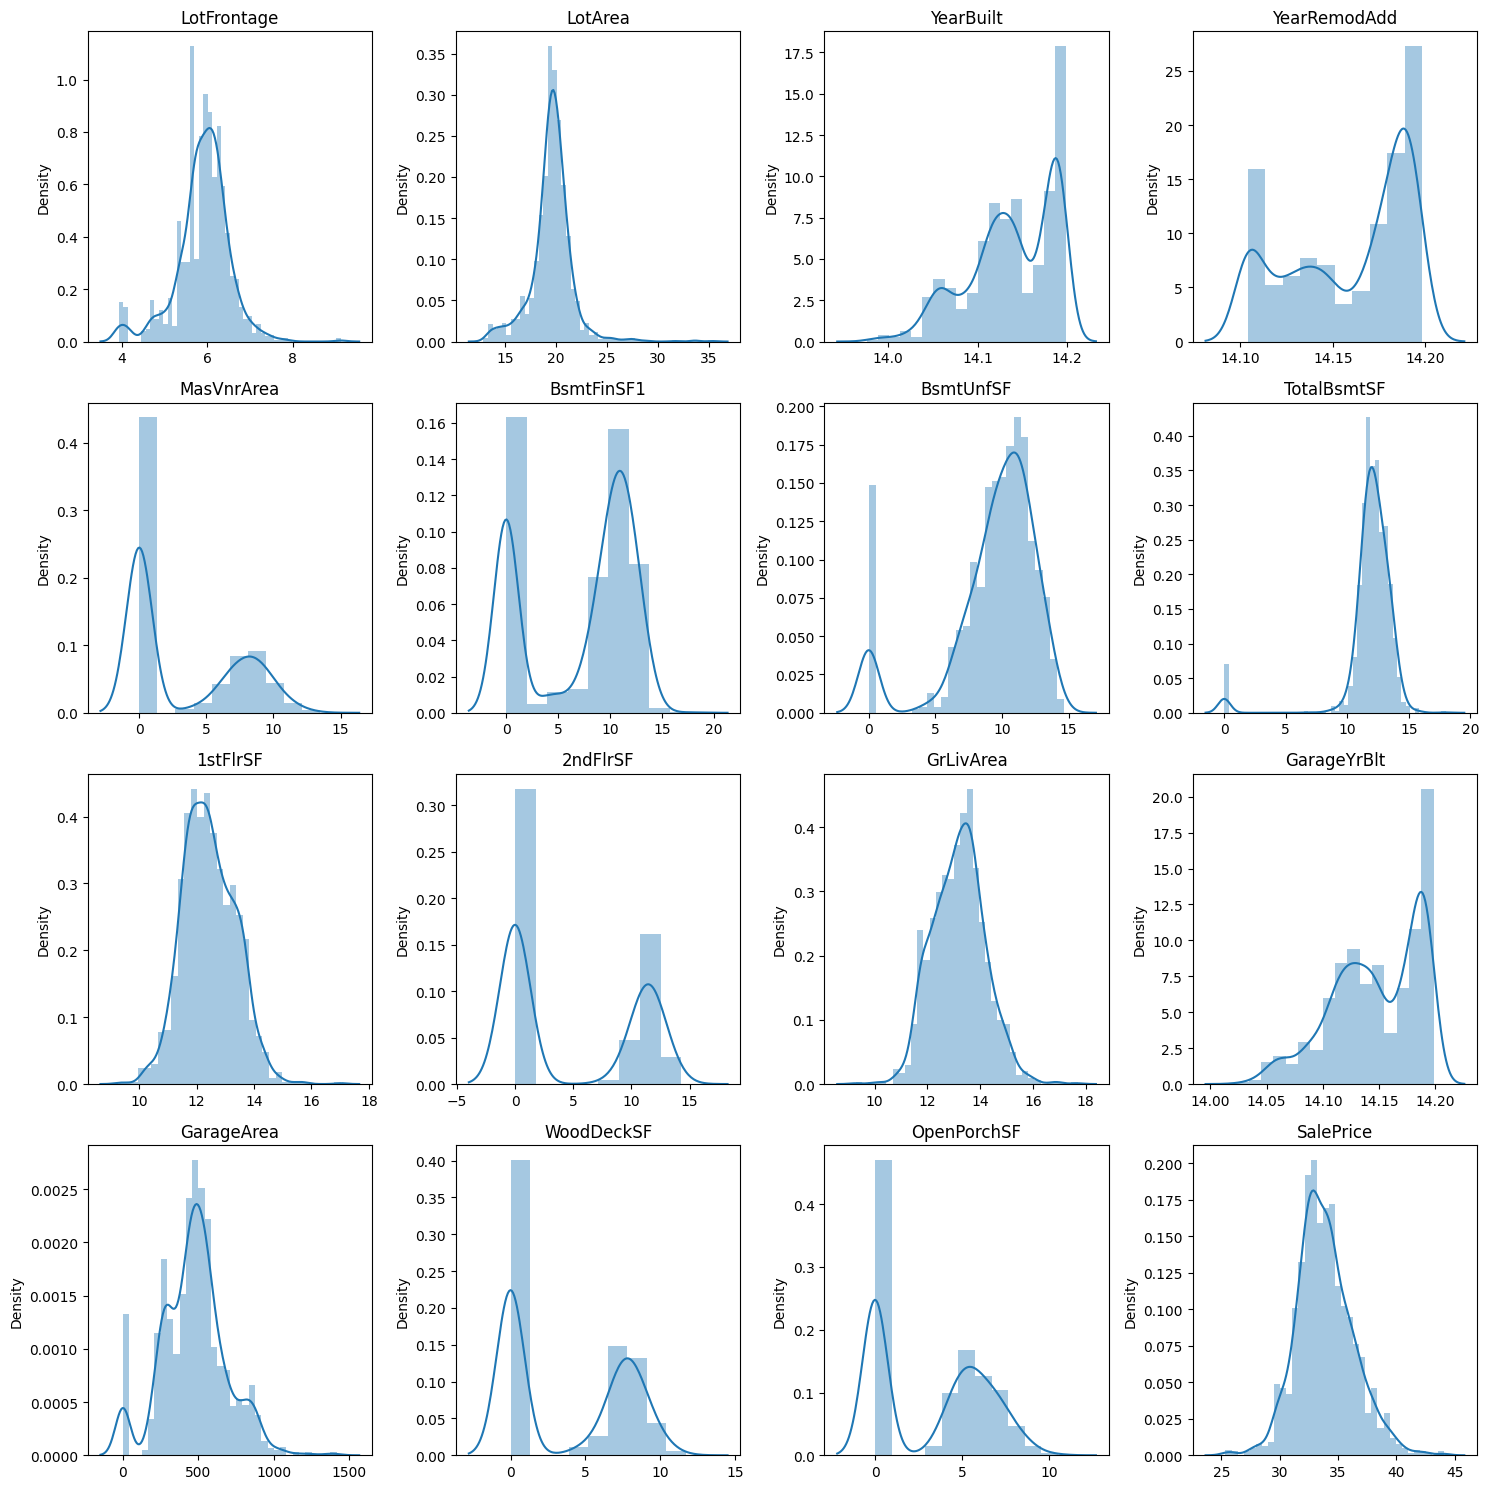

In [55]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(num_cols.columns):
    sns.distplot(x=num_cols[col], ax=axes[i])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

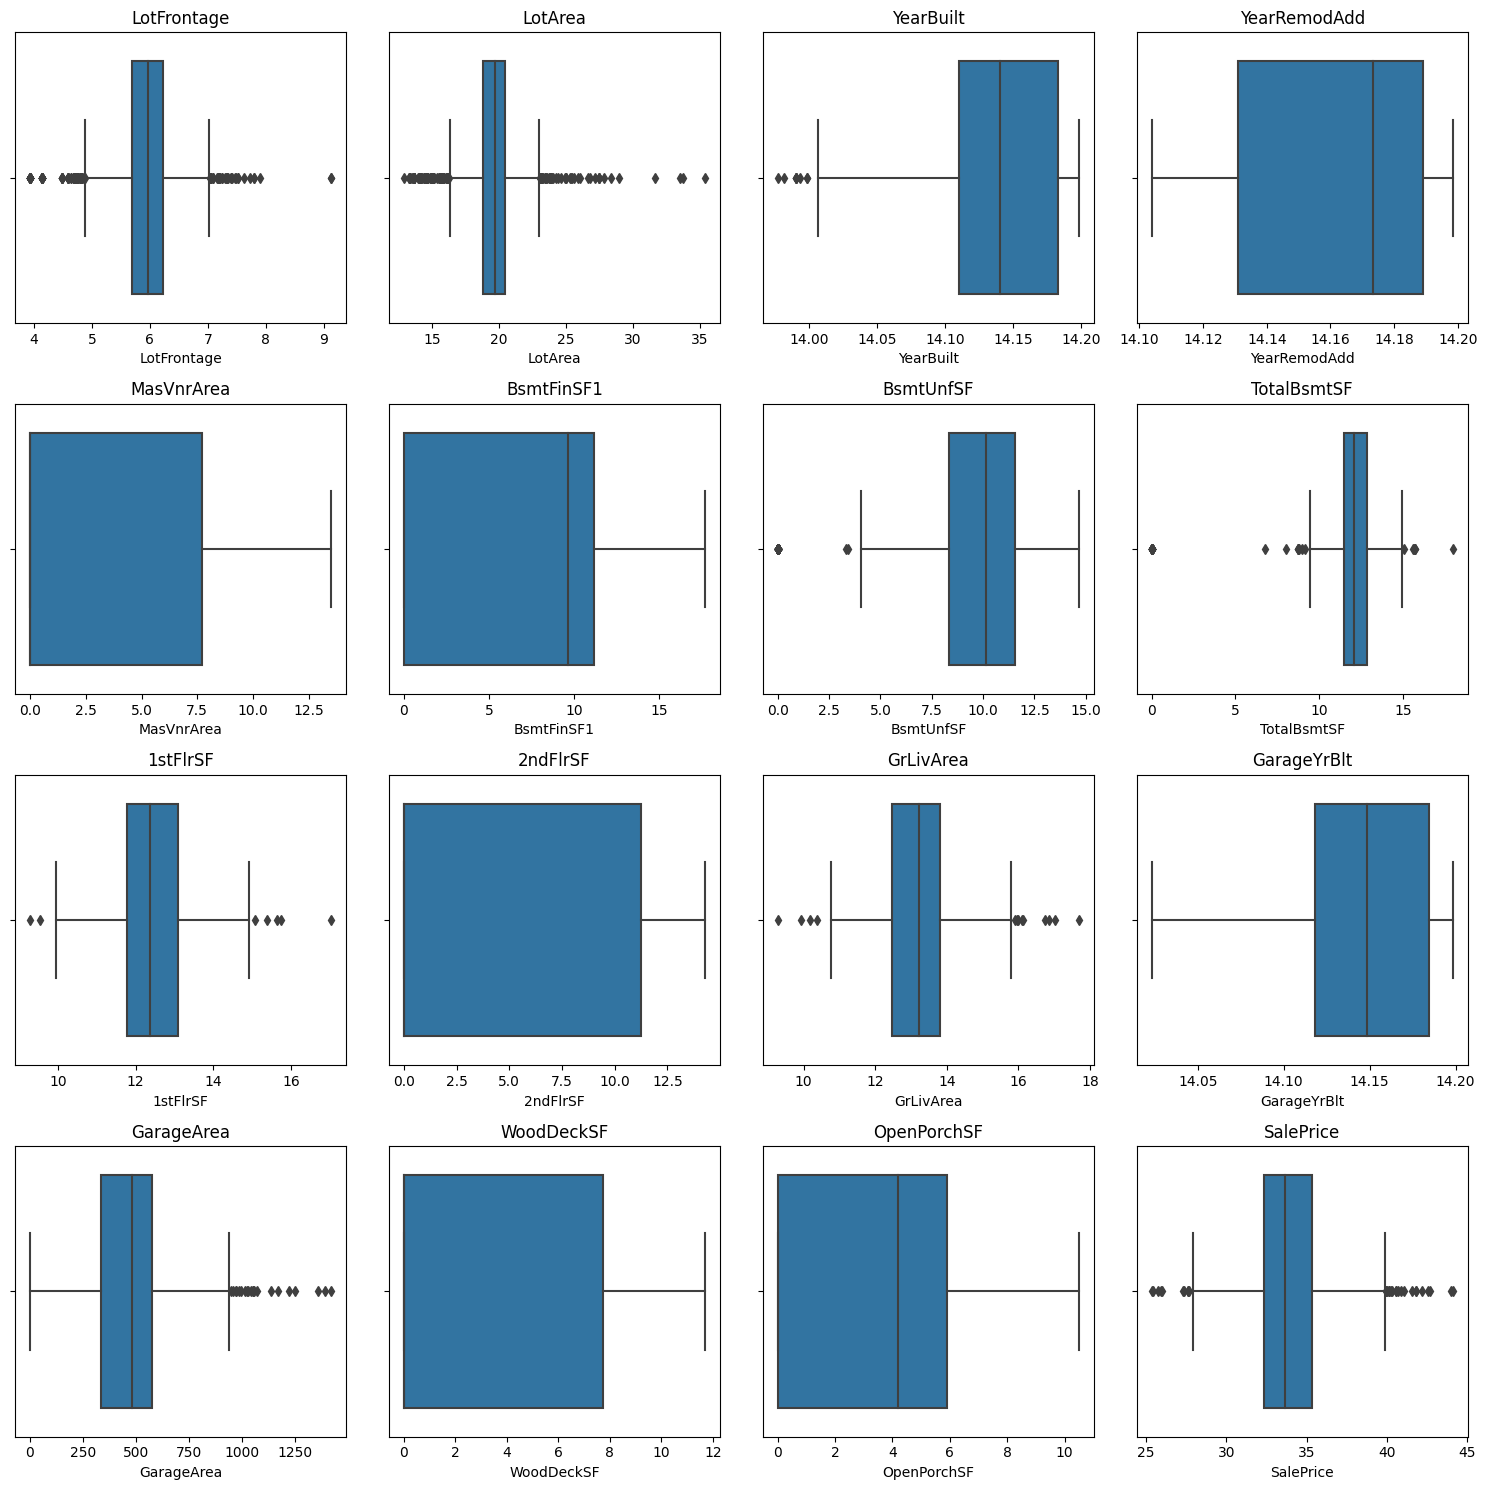

In [56]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(num_cols.columns):
    sns.boxplot(x=num_cols[col], ax=axes[i])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [57]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.2)
    Q3 = df[ft].quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls
index_list = []
for col in num_cols.columns:
    index_list.extend(outliers(num_cols, col))
print("list", index_list)
print("list", len(index_list))
final_list = list(set(index_list))
print("Final list", final_list)
print("list", len(final_list)) 

def remove_outliers(df, ls):
    df = df.drop(ls)
    return df

list [25, 35, 36, 41, 52, 56, 75, 85, 86, 88, 109, 145, 150, 151, 159, 161, 171, 193, 195, 197, 225, 227, 231, 232, 235, 249, 260, 276, 277, 278, 290, 302, 306, 313, 320, 335, 355, 363, 384, 408, 429, 430, 432, 434, 440, 446, 457, 473, 477, 489, 492, 500, 504, 523, 599, 614, 649, 655, 662, 665, 673, 675, 758, 774, 803, 807, 825, 829, 837, 845, 889, 906, 909, 915, 934, 939, 956, 959, 962, 963, 966, 991, 1007, 1010, 1029, 1038, 1039, 1057, 1061, 1086, 1088, 1091, 1104, 1106, 1107, 1109, 1127, 1151, 1160, 1162, 1168, 1169, 1173, 1182, 1186, 1191, 1211, 1219, 1243, 1270, 1273, 1291, 1298, 1305, 1313, 1322, 1334, 1337, 1339, 1346, 1359, 1361, 1378, 1396, 1449, 28, 41, 53, 56, 66, 75, 85, 113, 120, 124, 145, 159, 169, 171, 178, 180, 185, 193, 195, 197, 225, 227, 232, 235, 249, 260, 271, 277, 293, 301, 304, 313, 320, 335, 344, 347, 348, 349, 363, 364, 371, 384, 411, 417, 421, 422, 430, 432, 434, 446, 451, 457, 480, 482, 489, 490, 500, 504, 523, 529, 544, 558, 563, 588, 599, 614, 623, 649, 655

In [58]:
num_cols = remove_outliers(num_cols, final_list)
print(num_cols.shape)

(977, 16)


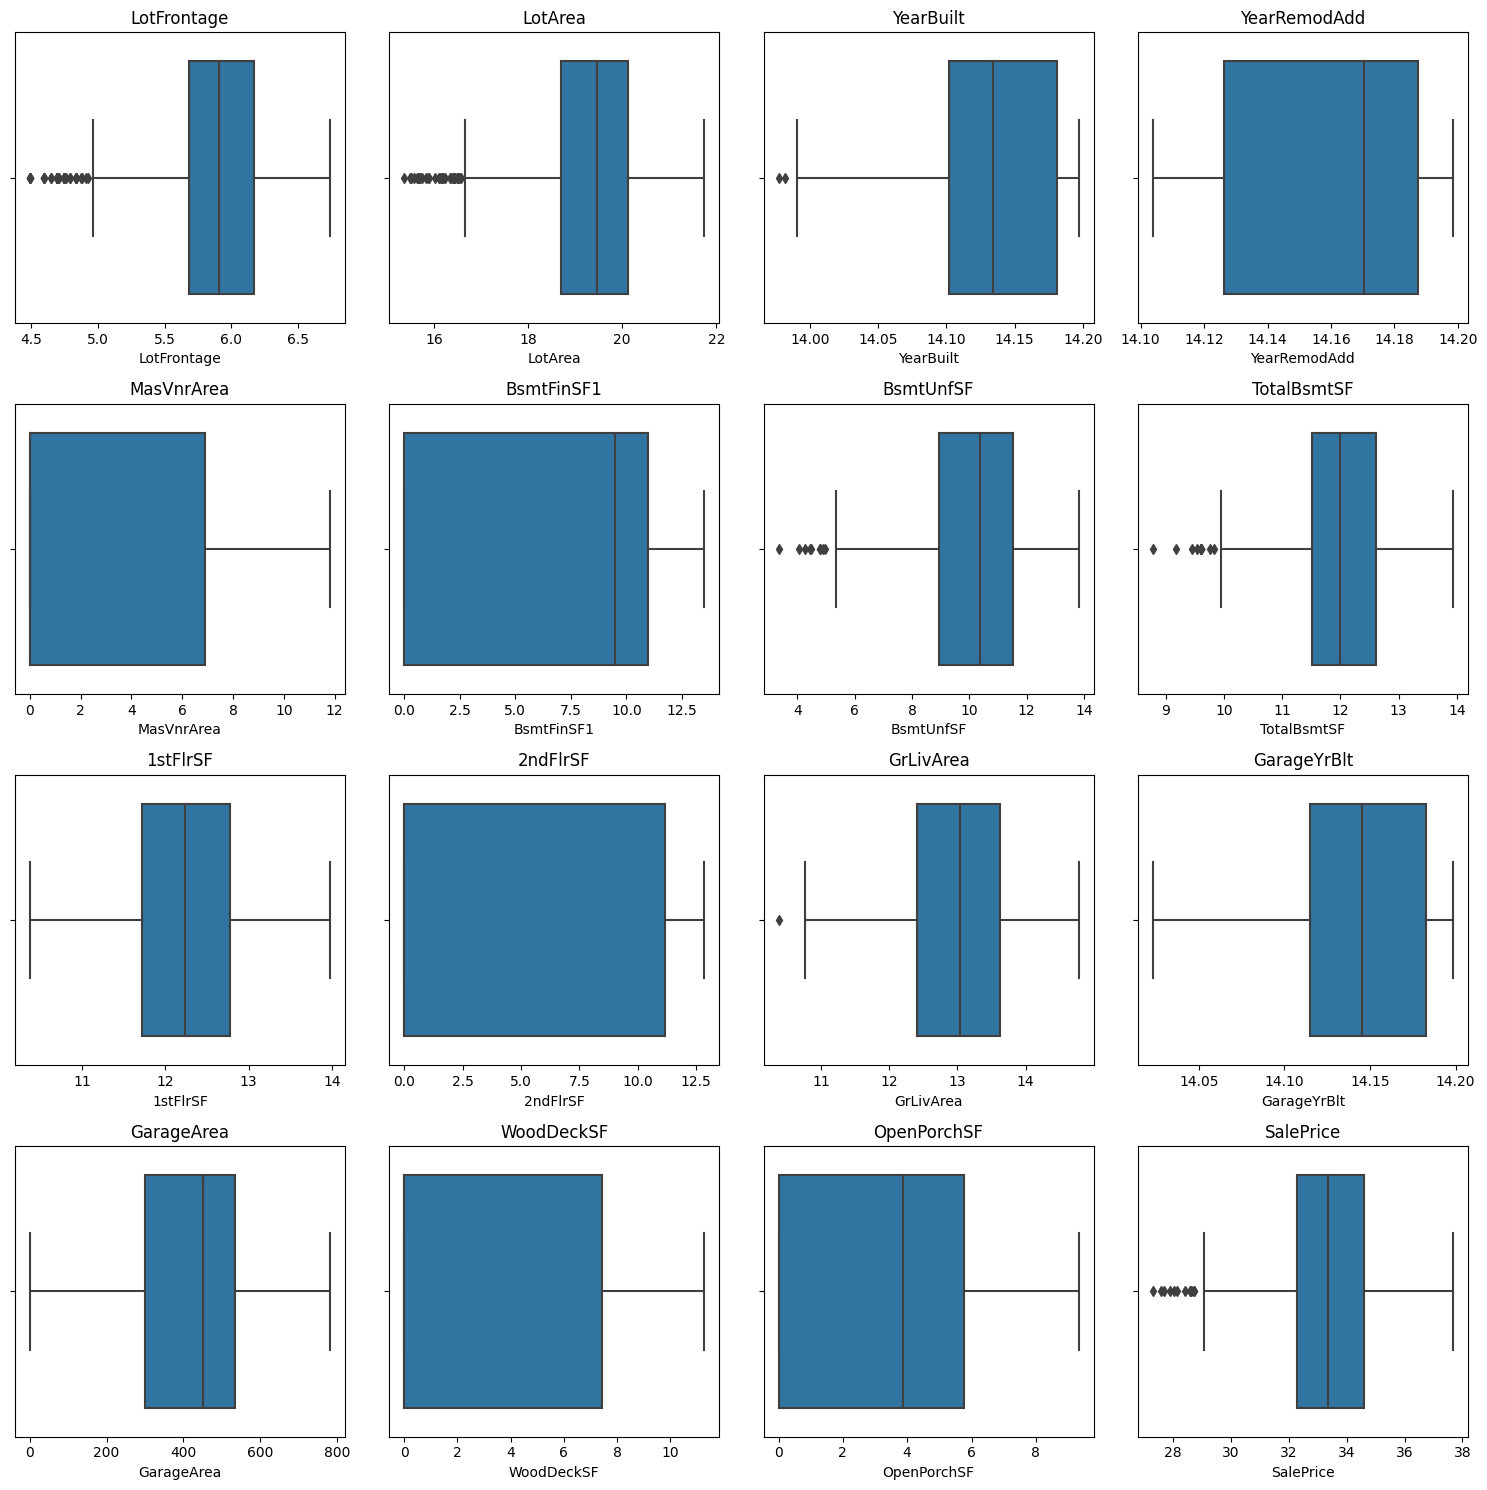

In [59]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))

axes = axes.ravel()
for i, col in enumerate(num_cols.columns):
    sns.boxplot(x=num_cols[col], ax=axes[i])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [60]:
print(num_cols.shape)
print(cat_mrg.shape)

(977, 16)
(1460, 162)


In [61]:
print(num_cols.shape)
num_cols = num_cols.reset_index(drop=True)
cat_mrg = cat_mrg.iloc[num_cols.index]
print(cat_mrg.shape)
data = pd.concat([num_cols, cat_mrg], axis=1)
data = data.dropna()
data.shape

(977, 16)
(977, 162)


(977, 178)

In [62]:
from sklearn.preprocessing import MinMaxScaler
# create the scaler object
scaler = MinMaxScaler()

# fit and transform the data using the scaler
normalized_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [63]:
normalized_df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces_2.0,Fireplaces_3.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,YearBuilt_bins_Better,YearBuilt_bins_Good,YearRemodAdd_bins_Worse,YearRemodAdd_bins_Worst
0,0.596682,0.603110,0.957436,0.884651,0.682254,0.826928,0.395438,0.565257,0.366327,0.909301,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.770382,0.681447,0.764548,0.436498,0.000000,0.892999,0.530468,0.778719,0.671348,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.633932,0.780935,0.943224,0.868144,0.647326,0.755121,0.627761,0.603968,0.421641,0.912289,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.531271,0.678211,0.320381,0.336203,0.000000,0.612536,0.680400,0.499543,0.455382,0.883460,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.822202,0.927424,0.886255,0.752402,0.000000,0.834101,0.235016,0.526666,0.311183,0.823973,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [64]:
sk = normalized_df.skew()
abs_sk = abs(sk)
high_sk = abs_sk[abs_sk > 0.5]

from scipy.stats import skew
from scipy.special import boxcox1p
for feature in high_sk.index:
    normalized_df[feature] = boxcox1p(normalized_df[feature], 0.15)

In [65]:
cln_df = normalized_df
cln_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces_2.0,Fireplaces_3.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,YearBuilt_bins_Better,YearBuilt_bins_Good,YearRemodAdd_bins_Worse,YearRemodAdd_bins_Worst
0,0.484741,0.489052,0.957436,0.884651,0.540964,0.826928,0.395438,0.565257,0.366327,0.909301,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0
1,0.596379,0.540444,0.764548,0.436498,0.000000,0.892999,0.530468,0.778719,0.671348,0.000000,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.730463,0.0
2,0.509522,0.602857,0.943224,0.868144,0.518315,0.755121,0.627761,0.603968,0.421641,0.912289,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.000000,1.0
3,0.440010,0.538362,0.320381,0.336203,0.000000,0.612536,0.680400,0.499543,0.455382,0.883460,...,0.0,0.0,0.0,0.0,0.730463,0.0,0.0,0.0,0.000000,0.0
4,0.627879,0.689564,0.886255,0.752402,0.000000,0.834101,0.235016,0.526666,0.311183,0.823973,...,0.0,0.0,0.0,0.0,0.730463,0.0,0.0,1.0,0.000000,1.0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error

In [68]:
y = cln_df["SalePrice"]
X = cln_df.drop(columns=["SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [69]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = lr.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.06273268363346836
R2 Score 0.7651572992244559
MAE 0.07670214338823095
R2 Score 0.6783123259479948


### Ridge

In [70]:
model = Ridge().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.052578846059540885
R2 Score 0.8175290153461514
MAE 0.06029667072726083
R2 Score 0.7903447070361457


### Ridge with Hyperparameter

In [97]:
model = Ridge(alpha=1.9).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.05290272926673467
R2 Score 0.8140485318379161
MAE 0.05930032008490705
R2 Score 0.7949116953587261


### SGD used as a Ridge

In [111]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='l2', max_iter=500, eta0=0.01, learning_rate='constant', alpha=0.01).fit(X_train, y_train)
y_pred_train = sgd.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = sgd.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.0564555575609392
R2 Score 0.7842704009698038
MAE 0.060012677018835336
R2 Score 0.7854298222671519


### Ridge used as a GD

In [116]:
reg = Ridge(max_iter=1000, solver='sparse_cg', alpha=0.1)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = reg.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.052169812319527546
R2 Score 0.8219213546316084
MAE 0.0629700679769739
R2 Score 0.7745769934515178


### Lasso Regression with Hyperparameter

In [71]:
model = Lasso(alpha=0.001).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.05625957564674884
R2 Score 0.7805983130607784
MAE 0.05393863240721919
R2 Score 0.8177099473325473
